---
<center><h1>Customer Segementation</h1></center>
<center><h3>Part of 30 Days 30 ML Projects Challenge</h3></center>

---

## 1) Understanding Problem Statement
---

The primary goal of this project is to employ advanced data analytics and machine learning methods to perform **customer segmentation** for a retail business. Customer segmentation is a critical task for understanding and effectively targeting different customer groups. This problem falls within the realm of **Classification Machine Learning** as it involves categorizing customers into distinct segments based on various attributes and behaviors. For example, You own the mall and want to understand the customers like who can be easily converge so that the sense can be given to marketing team and plan the strategy accordingly.

## 2) Understanding Data
---

The project uses **Customer Segmentation Data** which contains several variables (independent variables) and one outcome variable (dependent variable).

## 3) Getting System Ready
---
Importing required libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## 4) Data Eyeballing
---

### Laoding Data

In [2]:
customer_segment_data = pd.read_csv('Datasets/Day13_Customer_Segmentation_Data.csv') 

In [3]:
customer_segment_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print('The size of Dataframe is: ', customer_segment_data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
customer_segment_data.info()
print('-'*100)

The size of Dataframe is:  (200, 5)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
----------------------------------------------------------------------------------------------------


In [6]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in customer_segment_data.columns if customer_segment_data[feature].dtype != 'O']
categorical_features = [feature for feature in customer_segment_data.columns if customer_segment_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

We have 1 categorical features : ['Gender']


In [7]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=customer_segment_data.isnull().sum().sort_values(ascending=False)
percent=(customer_segment_data.isnull().sum()/customer_segment_data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


In [8]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
customer_segment_data.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
customer_segment_data.describe(include='object').T

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
Gender,200,2,Female,112


## 5) Data Cleaning & Preprocessing
---

### Choosing the Annual Income Column & Spending Score column

In [10]:
X = customer_segment_data.iloc[:,[3,4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## 6) Model Building
---

### Data Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
standardized_data = scaler.transform(X)

In [15]:
standardized_data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [16]:
X = standardized_data

In [17]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Chosing Number of Clusters

### Method-1: Using `.score()` method

In [18]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
scores = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(X)
    scores.append(K_Means.fit(X).score(X))

In [19]:
scores

[-400.00000000000006,
 -270.1559035072793,
 -157.7040081503594,
 -108.9213166136436,
 -65.56840815571681,
 -55.057348270386015,
 -44.91118554999014,
 -37.22935522094305,
 -32.44865134833634]

#### Elbow Curve (Number of Clusters Vs Score)

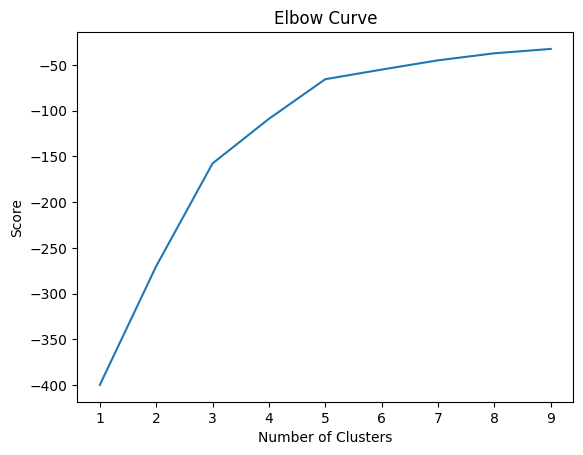

In [20]:
plt.plot(cluster_iteration,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

#### Method-2: Using `.inertia_` method (Within-Cluster Sum of Sqaures)

In [21]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
inertias = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(X)
    inertias.append(K_Means.inertia_)

In [22]:
inertias

[400.00000000000006,
 270.1559035072793,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.22935522094306,
 32.44865134833634]

#### Elbow Curve (Number of Clusters Vs Inertia)

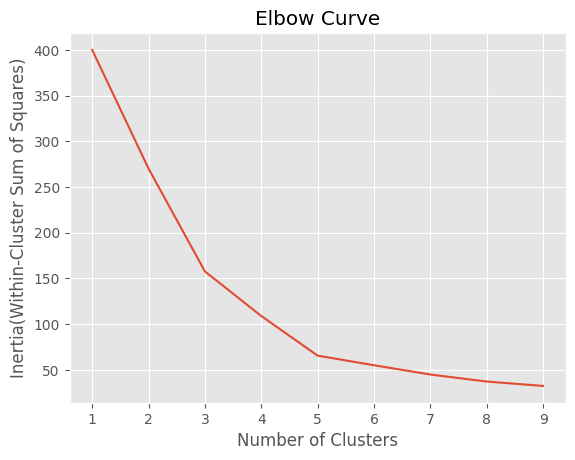

In [23]:
plt.plot(cluster_iteration,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia(Within-Cluster Sum of Squares)')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

### Model Comparison : Training & Evaluation

In [40]:
# For Model Building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [42]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,914.031449,1.467286e+06,1211.315750,0.513540
Lasso,913.798607,1.467179e+06,1211.271612,0.513575
Ridge,914.018520,1.467280e+06,1211.313347,0.513542
SVR,1275.296435,2.924914e+06,1710.238028,0.030281
Decision Tree Regressor,1090.772525,2.441913e+06,1562.662293,0.190414
Random Forest Regressor,811.145636,1.356565e+06,1164.716691,0.550248


### Inference

In the context of predicting Big Mart sales,
- The results reveal that the Random Forest Regressor outperforms its counterparts, demonstrating the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Its substantial R-squared (R2) value of 0.557 indicates that this model successfully captures a significant portion of the variance in sales data, making it the top choice for sales prediction. 
- Conversely, linear regression-based models (Linear Regression, Lasso, Ridge) show reasonably good but slightly inferior performance with R2 values around 0.514. 
- However, the Support Vector Regressor (SVR) and Decision Tree Regressor lag behind, struggling to provide accurate sales forecasts. The **Random Forest Regressor*** stands out as the **most promising** candidate for optimizing inventory management and sales forecasting in Big Mart stores.